(1000,)


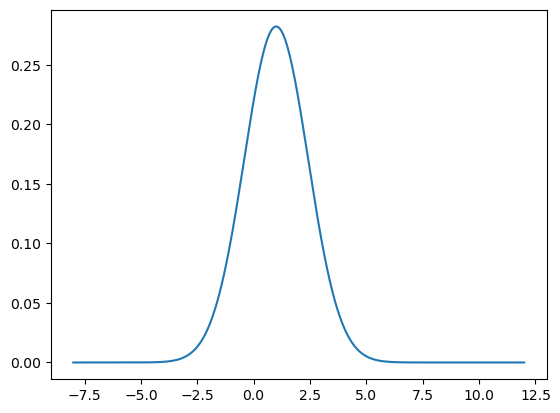

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def vcol(x):
    return x.reshape(-1, 1)
def vrow(x):
    return x.reshape(1, -1)
def logpdf_GAU_ND_singleSample(X, mu, C):

    _, C_logdet = np.linalg.slogdet(C)
    C_inv = np.linalg.inv(C)
    dotp = 0.5 * (X - mu).T @ C_inv @ (X - mu)

    return -C.shape[0]/2 * np.log(2*np.pi) - 0.5 * C_logdet - dotp

def logpdf_GAU_ND(X, mu, C):
    """
    Calculates the log of the probability density function of a multivariate Gaussian distribution.
    """
    print(X[:, 0:0+1])
    ll = [logpdf_GAU_ND_singleSample(X[:, i:i+1], mu, C) for i in range(X.shape[1])]
    print(np.array(ll).shape)
    return np.array(ll).ravel()


def logpdf_GAU_ND(X, mu, C):
    """
    Calculates the log of the probability density function of a multivariate Gaussian distribution.
    """
    _, C_logdet = np.linalg.slogdet(C)
    C_inv = np.linalg.inv(C)
    dotp = 0.5 * np.sum((X - mu) * (C_inv @ (X - mu)), axis=0)

    return -C.shape[0]/2 * np.log(2*np.pi) - 0.5 * C_logdet - dotp



# XND = np.load('mvg/XND.npy')
# mu = np.load('mvg/muND.npy')
# C = np.load('mvg/CND.npy')
# pdfSol = np.load('mvg/llND.npy')
# pdfGau = logpdf_GAU_ND(XND, mu, C)
# print(np.abs(pdfSol - pdfGau).max())

plt.figure()
XPlot = np.linspace(-8, 12, 1000)
m = np.ones((1,1)) * 1.0
C = np.ones((1,1)) * 2.0
print(XPlot.shape)
plt.plot(XPlot, np.exp(logpdf_GAU_ND(vrow(XPlot), m.T, C)))
plt.show()

(1, 10000)


-23227.07765460273

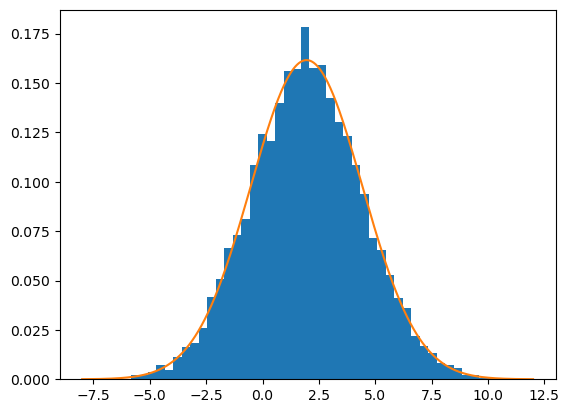

In [2]:
xnd = np.load('mvg/XND.npy')

def loglikelihood(D):
    m = D.sum(axis=1) / D.shape[1]
    z = D - vcol(m)
    C = (z @ z.T) / D.shape[1]

    sum = 0
    for i in range(0, D.shape[1]):
        logpdf = logpdf_GAU_ND_singleSample(D[:, i:i+1].ravel(), m, C)
        sum += logpdf
    return sum

ll = loglikelihood(xnd)
ll

X1D = np.load('mvg/X1D.npy')
print(X1D.shape)
m = X1D.sum(axis=1) / X1D.shape[1]
z = X1D - vcol(m)
C = (z @ z.T) / X1D.shape[1]
plt.figure()
plt.hist(X1D.ravel(), bins=50, density=True)
XPlot = np.linspace(-8, 12, 1000)
plt.plot(XPlot.ravel(), np.exp(logpdf_GAU_ND(vrow(XPlot), m, C)))

ll = loglikelihood(X1D)
ll